# Checklist
- Data Info
- Data Types
- Missing Values
- Duplicated Values
- Unique Values
- Distributions & Outliers
- Correlations

# Task Details
Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

# Data Source
https://www.kaggle.com/datasets/brendan45774/test-file

# Imports

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from data_gadgets.cleaning import Cleaner
from data_gadgets.visualization import Visualizer

# Reading Data

In [3]:
path = os.path.join('..', '..', 'data', 'interim', 'data_task1.csv')
data = pd.read_csv(path)

In [4]:
data.head()

,survived,pclass,age,fare,family,sex_Male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_N,embarked_Q,embarked_S
0,0,3,34.5,7.8292,0,1,0,0,0,0,0,0,1,1,0
1,1,3,47.0,7.0000,1,0,0,0,0,0,0,0,1,0,1
2,0,2,62.0,9.6875,0,1,0,0,0,0,0,0,1,1,0
3,0,3,27.0,8.6625,0,1,0,0,0,0,0,0,1,0,1
4,1,3,22.0,12.2875,1,0,0,0,0,0,0,0,1,0,1


# Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    418 non-null    int64  
 1   pclass      418 non-null    int64  
 2   age         418 non-null    float64
 3   fare        418 non-null    float64
 4   family      418 non-null    int64  
 5   sex_Male    418 non-null    int64  
 6   cabin_B     418 non-null    int64  
 7   cabin_C     418 non-null    int64  
 8   cabin_D     418 non-null    int64  
 9   cabin_E     418 non-null    int64  
 10  cabin_F     418 non-null    int64  
 11  cabin_G     418 non-null    int64  
 12  cabin_N     418 non-null    int64  
 13  embarked_Q  418 non-null    int64  
 14  embarked_S  418 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 49.1 KB


# Data Types

In [6]:
cleaner = Cleaner()
cols = cleaner.separate_data(data, 'survived')
cols

{'target': ['survived'],
 'time': [],
 'category': [],
 'category+': [],
 'continuous': ['age', 'fare'],
 'continuous+': [],
 'discrete': ['pclass',
  'family',
  'sex_Male',
  'cabin_B',
  'cabin_C',
  'cabin_D',
  'cabin_E',
  'cabin_F',
  'cabin_G',
  'cabin_N',
  'embarked_Q',
  'embarked_S']}

# Missing Values

In [7]:
data.isnull().sum()

survived      0
pclass        0
age           0
fare          0
family        0
sex_Male      0
cabin_B       0
cabin_C       0
cabin_D       0
cabin_E       0
cabin_F       0
cabin_G       0
cabin_N       0
embarked_Q    0
embarked_S    0
dtype: int64

# Duplicated Values

In [8]:
data.duplicated().sum()

38

# Unique Values

In [9]:
for feature in data.columns:
    print(feature, ':', len(data[feature].unique()))

survived : 2
pclass : 3
age : 79
fare : 169
family : 2
sex_Male : 2
cabin_B : 2
cabin_C : 2
cabin_D : 2
cabin_E : 2
cabin_F : 2
cabin_G : 2
cabin_N : 2
embarked_Q : 2
embarked_S : 2


# Distributions

In [10]:
data.describe()

,survived,pclass,age,fare,family,sex_Male,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_N,embarked_Q,embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,35.576535,0.394737,0.636364,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.782297,0.110048,0.645933
std,0.481622,0.841838,12.703770,55.850103,0.489380,0.481622,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.413179,0.313324,0.478803
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,27.000000,14.454200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.750000,31.471875,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,76.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
visualizer = Visualizer()

## Time

In [12]:
try:
    visualizer.multivariate_subplots(data[cols['continuous']+cols['time']], cols['time'][0], kind='time')
except:
    pass

## Continuous

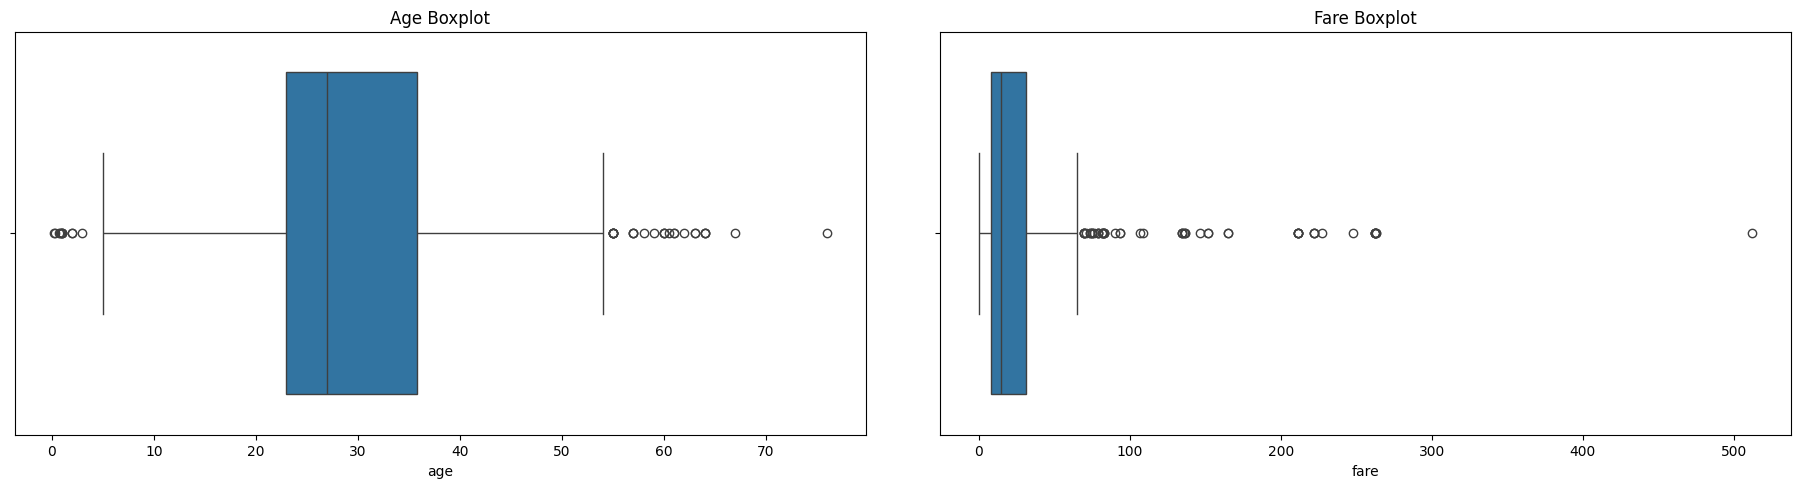

In [13]:
visualizer.univariate_subplots(data[cols['continuous']], 'boxplot', 2, 2)

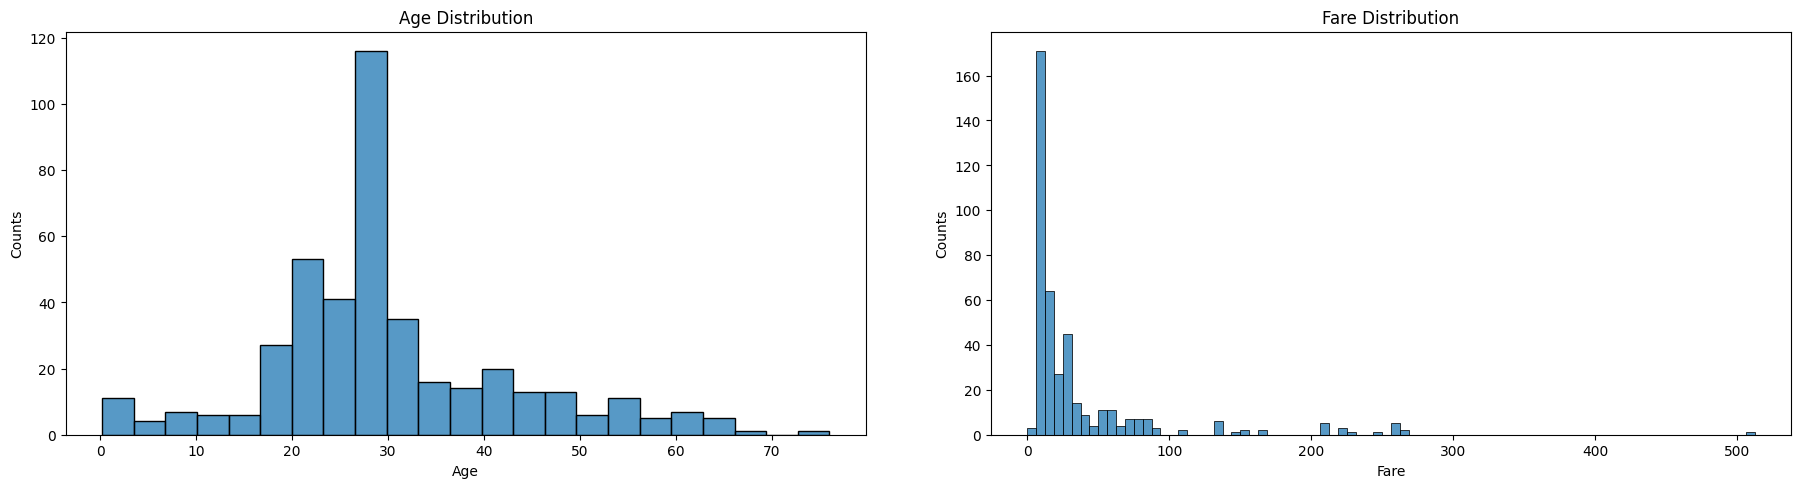

In [14]:
visualizer.univariate_subplots(data[cols['continuous']], 'numerical_counts', 2, 2)

## Discrete

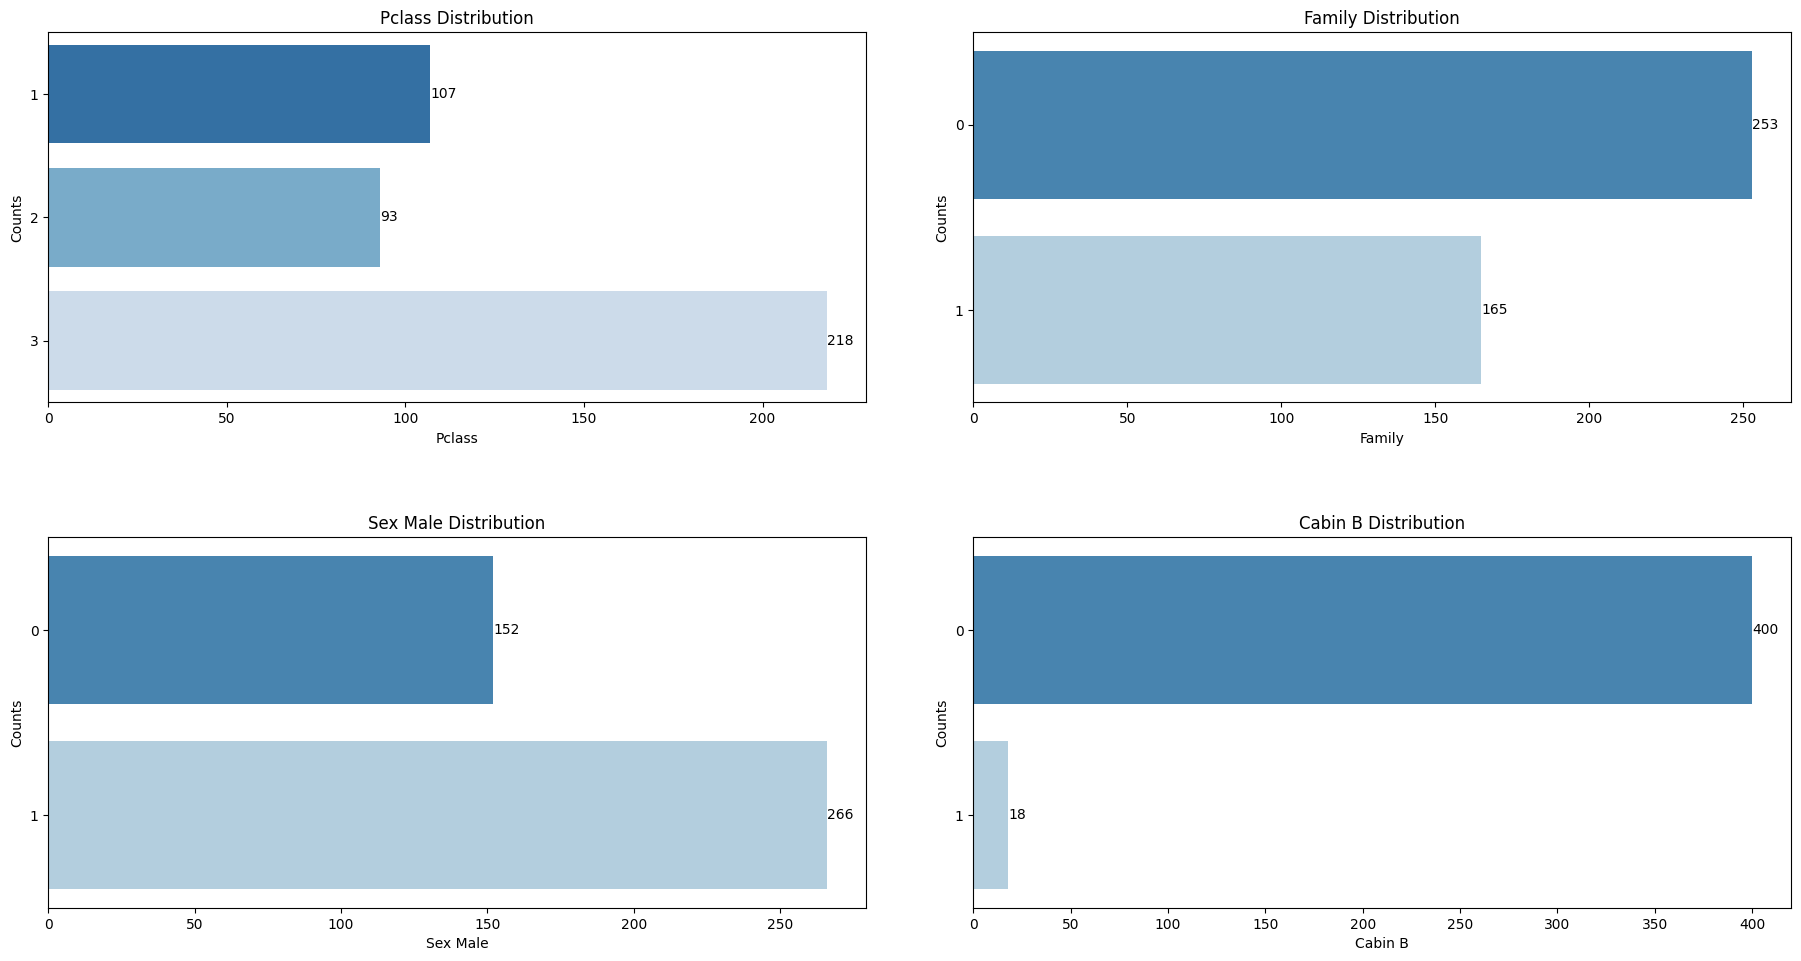

In [15]:
visualizer.univariate_subplots(data[cols['discrete']], 'category_counts', 2, 2)

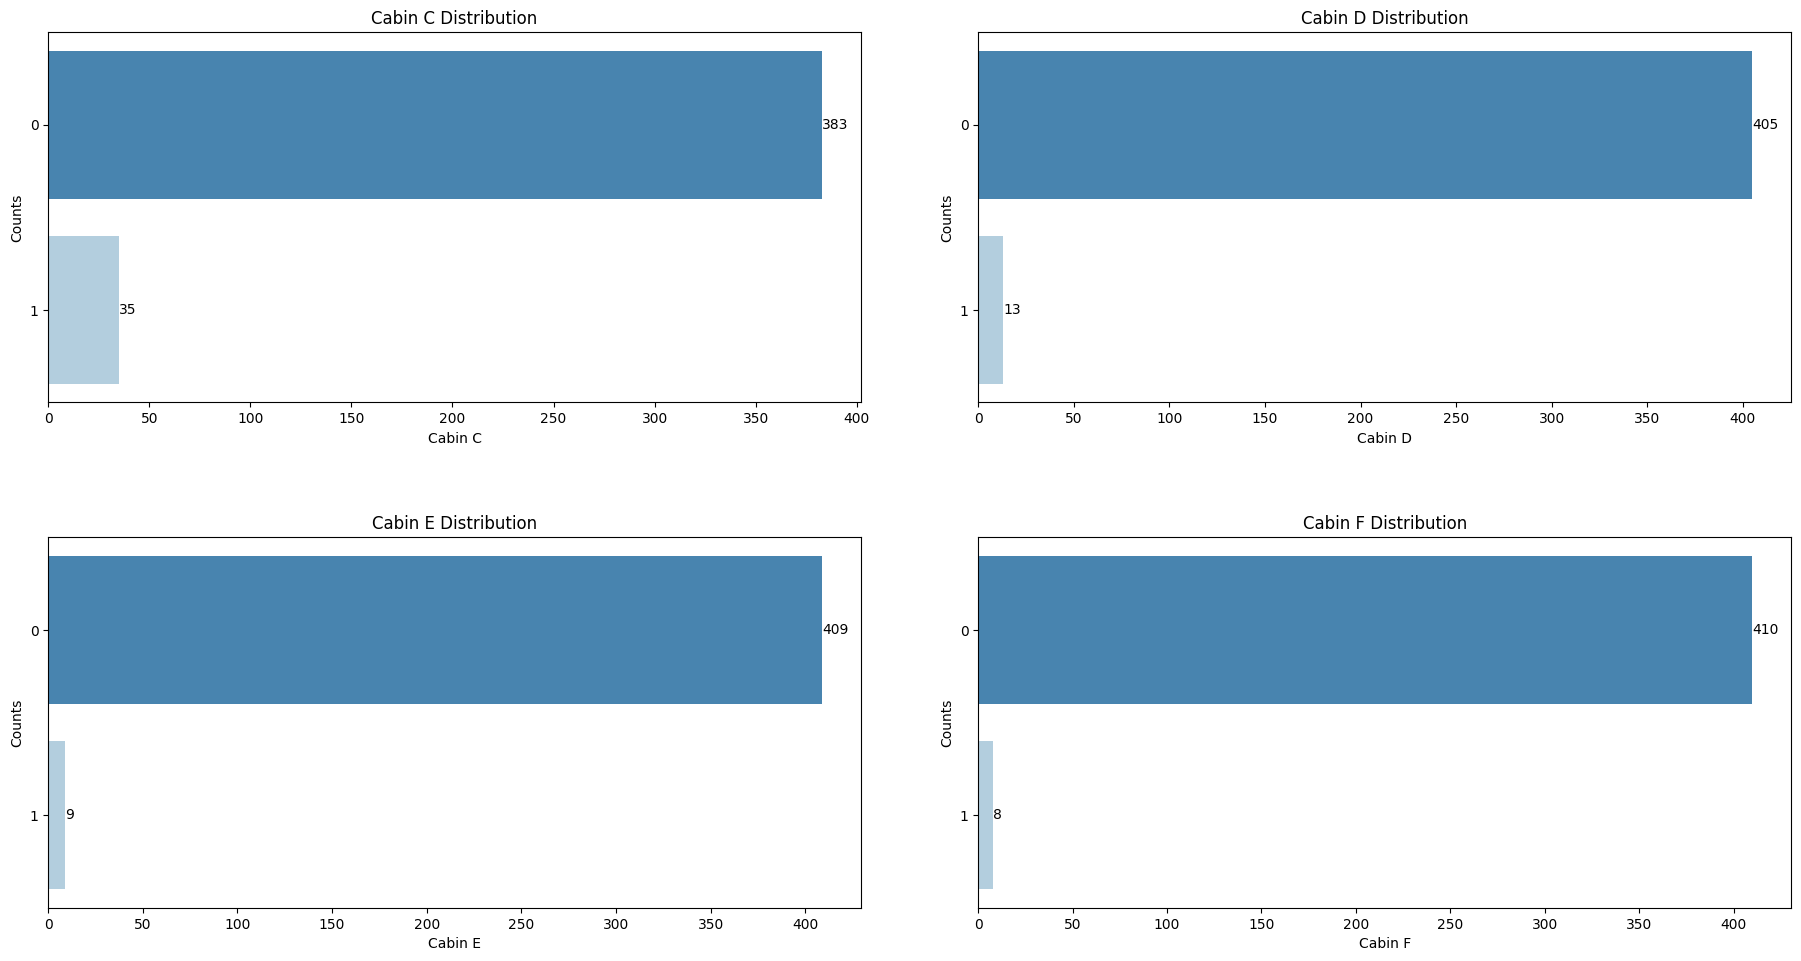

In [16]:
visualizer.univariate_subplots(data[cols['discrete'][4:]], 'category_counts', 2, 2)

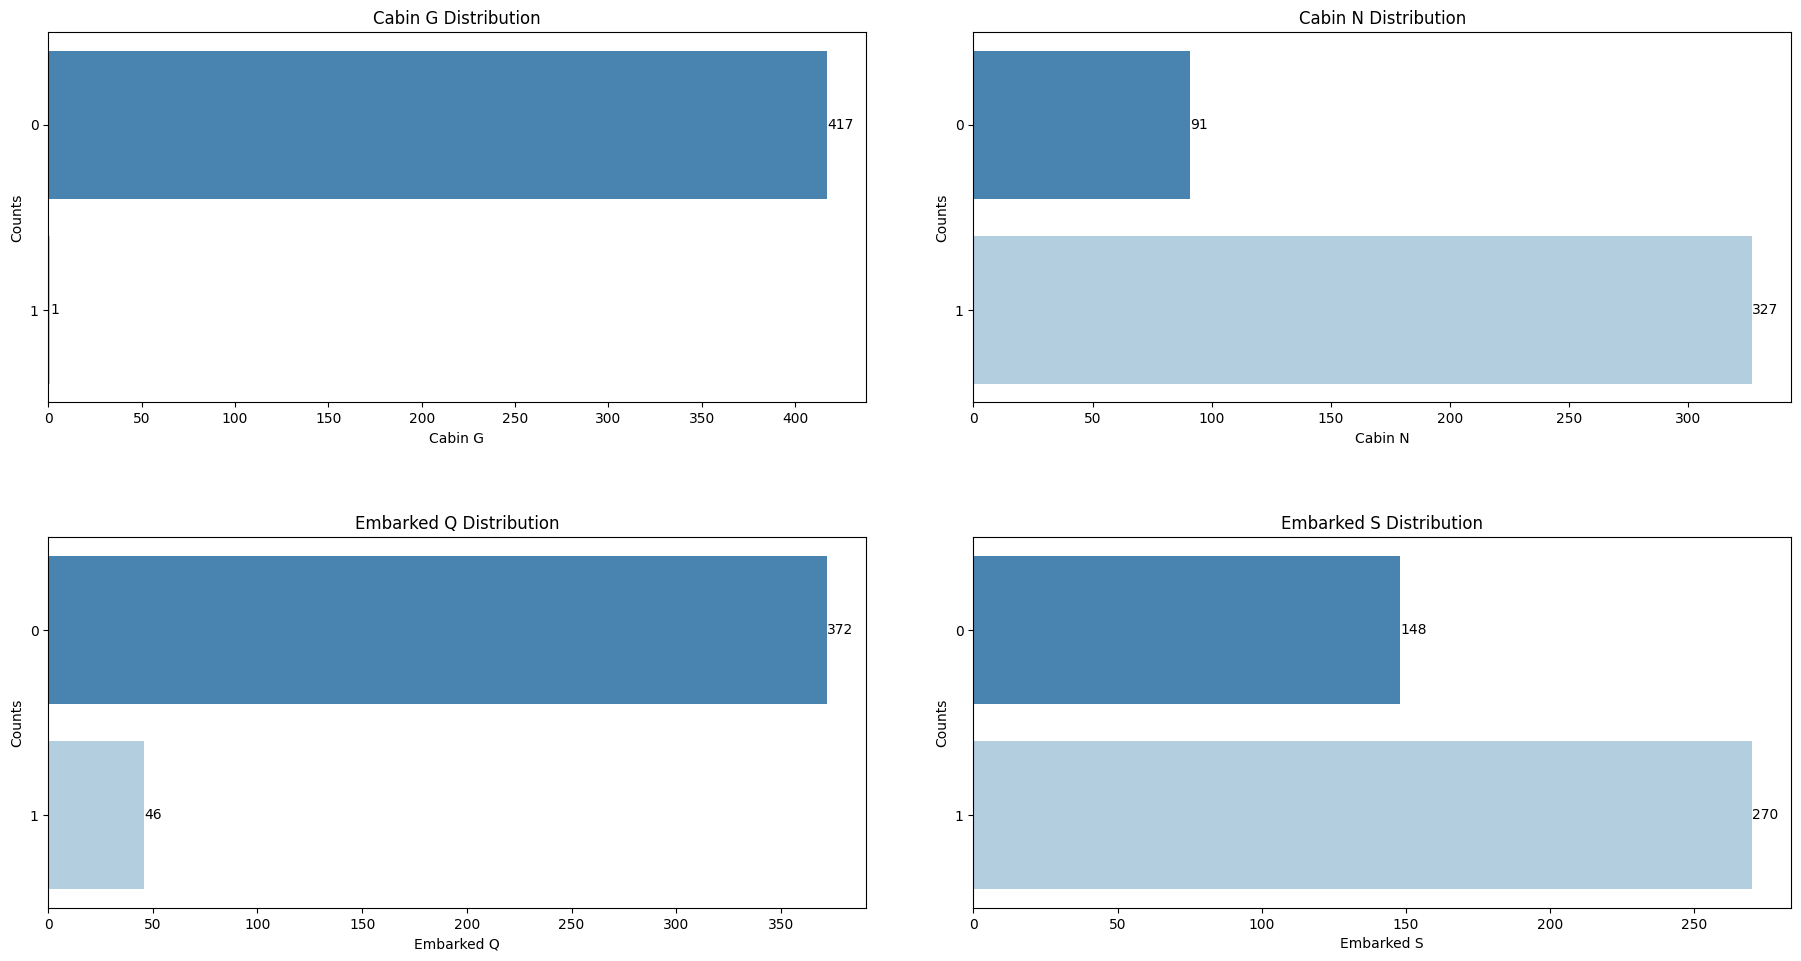

In [17]:
visualizer.univariate_subplots(data[cols['discrete'][8:]], 'category_counts', 2, 2)

## Categorical

In [18]:
visualizer.univariate_subplots(data[cols['category']], 'category_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Target

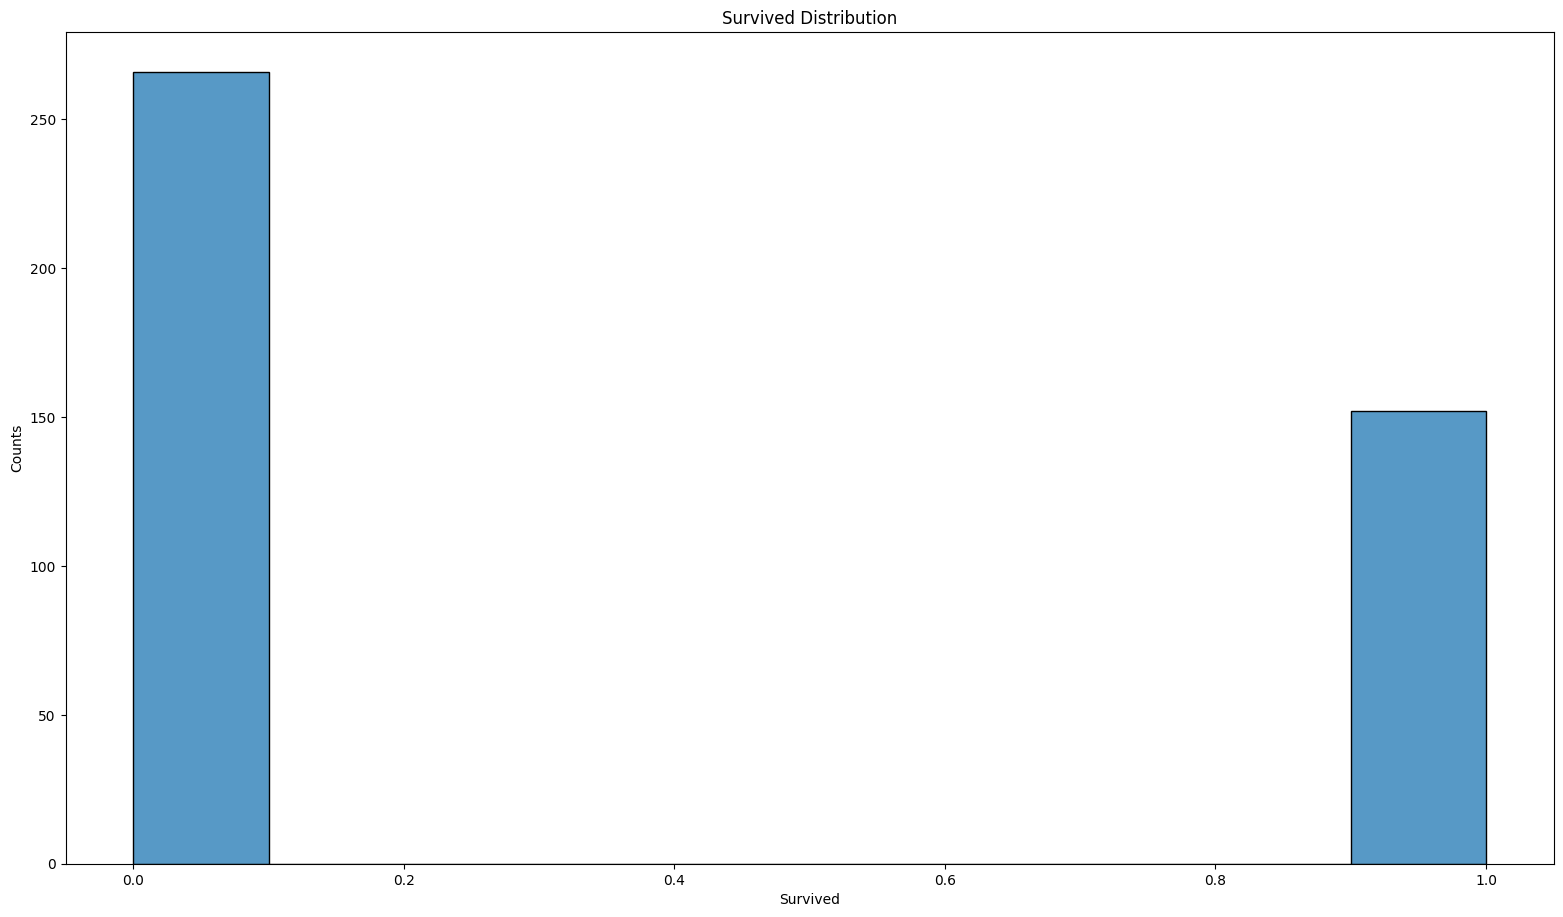

In [19]:
try:
    visualizer.numerical_counts(data, cols['target'][0])
except:
    visualizer.category_counts(data, cols['target'][0])

In [20]:
try:
    visualizer.multivariate_subplots(data[cols['time']+cols['target']], cols['time'][0], kind='time')
except:
    pass

# Correlations

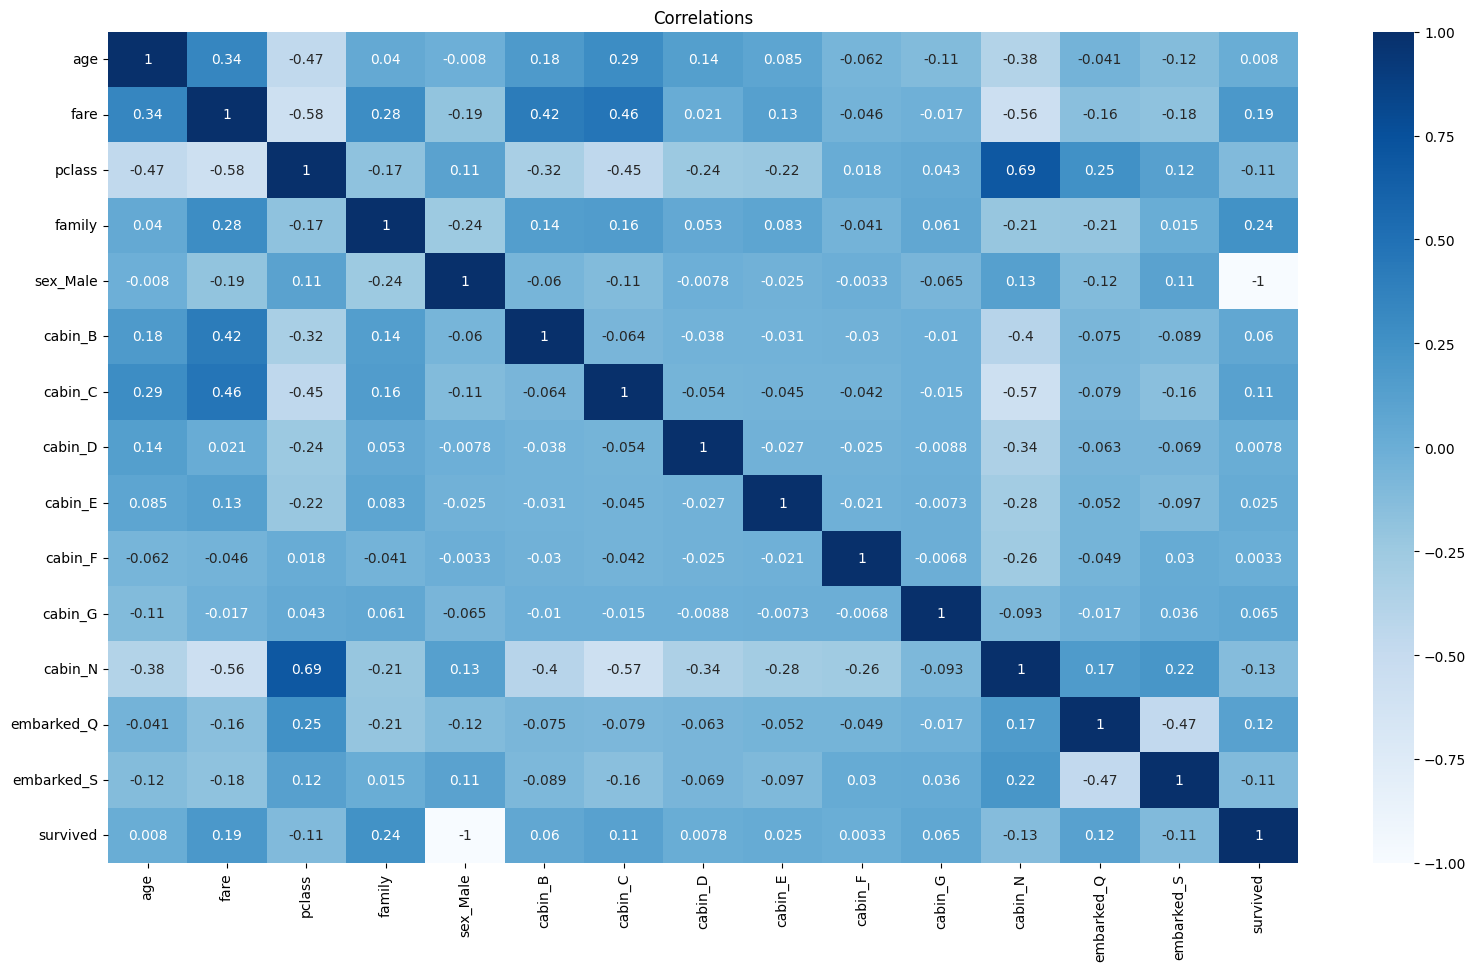

In [21]:
visualizer.correlations(data, cols['continuous']+cols['discrete']+cols['target'])

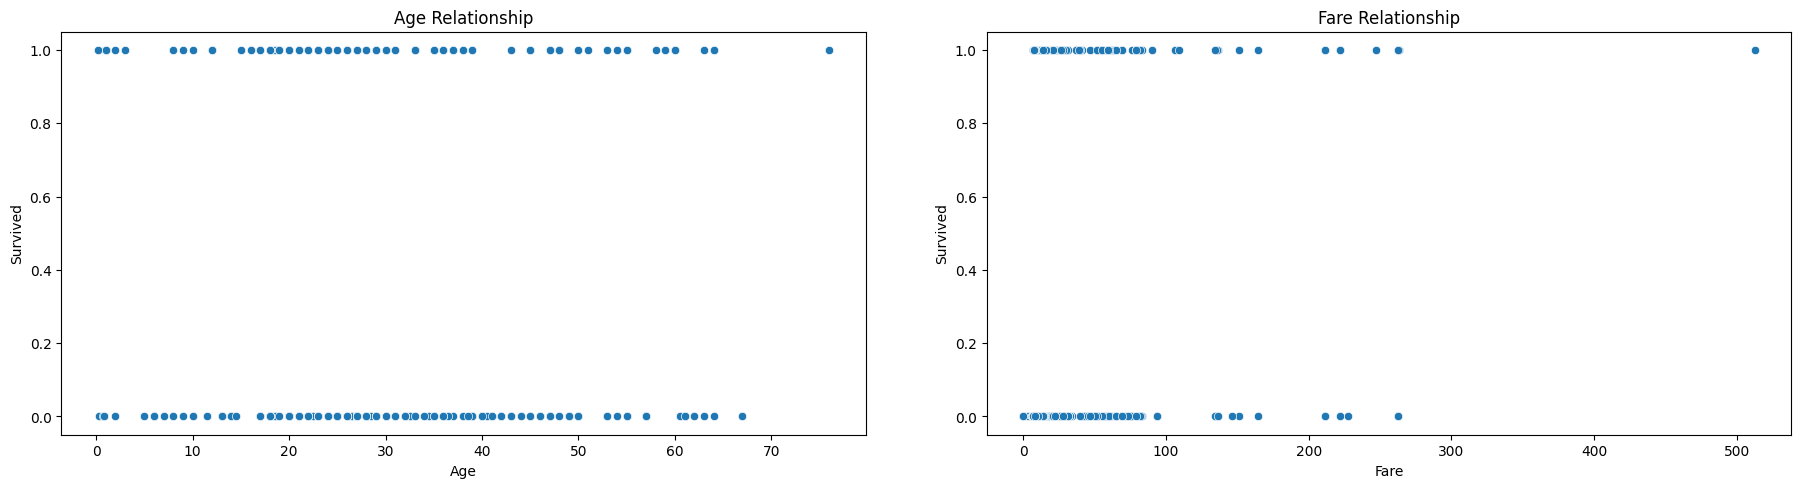

In [22]:
visualizer.multivariate_subplots(data[cols['continuous']+cols['target']], cols['target'][0], 'relationship', max_rows=2, max_cols=2)

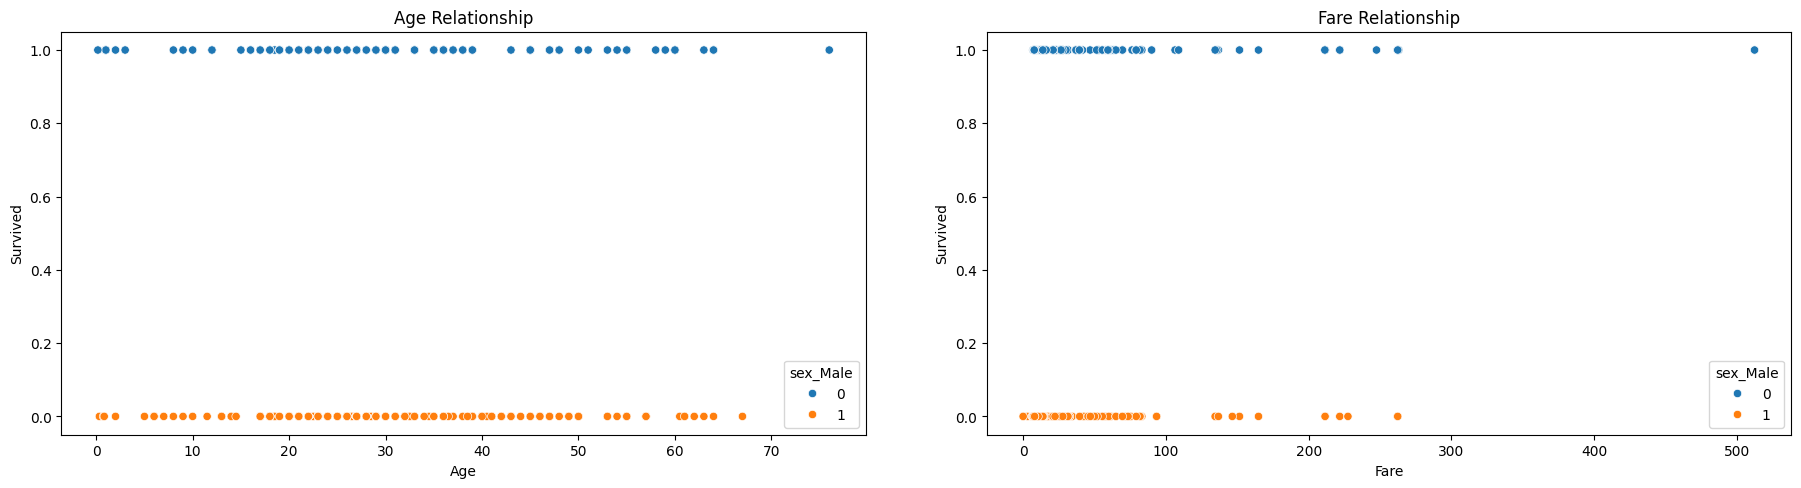

In [23]:
visualizer.multivariate_subplots(data[cols['continuous']+cols['target']], cols['target'][0], 'relationship', hue=data.sex_Male, max_rows=2, max_cols=2)

# Conclusion
- Missing Values: None
- Duplicated Values: Few
- Outliers: Few
- Notes
    - It seems only females survived and all males died (Talk aout being biased. geez)